# WeatherPy
----

##### Key Observations
1. There are more cities in the Northern Hemisphere (Antartica occupies a large portion of the southern hemisphere)
2. There is a definite correlation between maximum temperature and distance to the equator
3. Humidy, Wind Speed and Cloudiness do not appear to have the same correlation with latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

import requests
import json
import os

from matplotlib.offsetbox import AnchoredText

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
#output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-180, 180)  #open up entire range
lng_range = (-180, 180)


## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000,  high=90.000,  size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
number_of_cities = len(cities)
print(f"This program will look at {number_of_cities} cities")

This program will look at 746 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, number_of_cities, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  746  | provideniya
Processing Record  1 of Set  746  | buraydah
Processing Record  2 of Set  746  | cherskiy
Processing Record  3 of Set  746  | dondo
Processing Record  4 of Set  746  | kabinda
Processing Record  5 of Set  746  | cape town
Processing Record  6 of Set  746  | bluff
Processing Record  7 of Set  746  | kiama
Processing Record  8 of Set  746  | licata
Processing Record  9 of Set  746  | ushuaia
Processing Record  10 of Set  746  | saskylakh
Processing Record  11 of Set  746  | opuwo
Processing Record  12 of Set  746  | kieta
Processing Record  13 of Set  746  | punta arenas
Processing Record  14 of Set  746  | butaritari
Processing Record  15 of Set  746  | hunza
City  not  found. Skipping...
Processing Record  16 of Set  746  | busselton
Processing Record  17 of Set  746  | hasaki
Processing Record  18 of Set  746  | gamba
Processing Record  19 of Set  746  | barrow
Processing Record  20

Processing Record  121 of Set  746  | mys shmidta
City  not  found. Skipping...
Processing Record  122 of Set  746  | nizhneyansk
City  not  found. Skipping...
Processing Record  123 of Set  746  | anadyr
Processing Record  124 of Set  746  | krasnyy chikoy
Processing Record  125 of Set  746  | san andres
Processing Record  126 of Set  746  | mayo
Processing Record  127 of Set  746  | georgetown
Processing Record  128 of Set  746  | bajo baudo
City  not  found. Skipping...
Processing Record  129 of Set  746  | ranau
Processing Record  130 of Set  746  | saleaula
City  not  found. Skipping...
Processing Record  131 of Set  746  | pevek
Processing Record  132 of Set  746  | yellowknife
Processing Record  133 of Set  746  | le port
Processing Record  134 of Set  746  | inhambane
Processing Record  135 of Set  746  | dothan
Processing Record  136 of Set  746  | mar del plata
Processing Record  137 of Set  746  | houma
Processing Record  138 of Set  746  | ystad
Processing Record  139 of Se

Processing Record  239 of Set  746  | san patricio
Processing Record  240 of Set  746  | palauig
Processing Record  241 of Set  746  | poso
Processing Record  242 of Set  746  | saint-pierre
Processing Record  243 of Set  746  | port lincoln
Processing Record  244 of Set  746  | kahului
Processing Record  245 of Set  746  | lata
Processing Record  246 of Set  746  | aykhal
Processing Record  247 of Set  746  | chengmai
City  not  found. Skipping...
Processing Record  248 of Set  746  | cambyreta
City  not  found. Skipping...
Processing Record  249 of Set  746  | jenjarom
Processing Record  250 of Set  746  | riviere-au-renard
Processing Record  251 of Set  746  | weihe
Processing Record  252 of Set  746  | conde
Processing Record  253 of Set  746  | port moresby
Processing Record  254 of Set  746  | tank
Processing Record  255 of Set  746  | vulcan
Processing Record  256 of Set  746  | umm lajj
Processing Record  257 of Set  746  | atambua
Processing Record  258 of Set  746  | garissa


Processing Record  361 of Set  746  | grindavik
Processing Record  362 of Set  746  | havelock
Processing Record  363 of Set  746  | santa luzia
Processing Record  364 of Set  746  | alghero
Processing Record  365 of Set  746  | aloleng
Processing Record  366 of Set  746  | tingrela
City  not  found. Skipping...
Processing Record  367 of Set  746  | joshimath
Processing Record  368 of Set  746  | ponta delgada
Processing Record  369 of Set  746  | isla mujeres
Processing Record  370 of Set  746  | asau
Processing Record  371 of Set  746  | tumannyy
City  not  found. Skipping...
Processing Record  372 of Set  746  | douglas
Processing Record  373 of Set  746  | nguruka
Processing Record  374 of Set  746  | hervey bay
Processing Record  375 of Set  746  | caramutan
Processing Record  376 of Set  746  | matay
Processing Record  377 of Set  746  | dudinka
Processing Record  378 of Set  746  | cooma
Processing Record  379 of Set  746  | arrifes
Processing Record  380 of Set  746  | kunyang


Processing Record  479 of Set  746  | adrar
Processing Record  480 of Set  746  | puerto del rosario
Processing Record  481 of Set  746  | verkhnevilyuysk
Processing Record  482 of Set  746  | gushikawa
Processing Record  483 of Set  746  | yuancheng
Processing Record  484 of Set  746  | aklavik
Processing Record  485 of Set  746  | popondetta
Processing Record  486 of Set  746  | springbok
Processing Record  487 of Set  746  | suhbaatar
Processing Record  488 of Set  746  | hailar
Processing Record  489 of Set  746  | rurrenabaque
Processing Record  490 of Set  746  | artyom
Processing Record  491 of Set  746  | ngunguru
Processing Record  492 of Set  746  | matamoros
Processing Record  493 of Set  746  | portland
Processing Record  494 of Set  746  | witney
Processing Record  495 of Set  746  | neuquen
Processing Record  496 of Set  746  | camacari
Processing Record  497 of Set  746  | rabo de peixe
Processing Record  498 of Set  746  | kokstad
Processing Record  499 of Set  746  | k

Processing Record  598 of Set  746  | evensk
Processing Record  599 of Set  746  | pitimbu
Processing Record  600 of Set  746  | amga
Processing Record  601 of Set  746  | santa cruz de la palma
Processing Record  602 of Set  746  | luanda
Processing Record  603 of Set  746  | nasrullaganj
City  not  found. Skipping...
Processing Record  604 of Set  746  | bunbury
Processing Record  605 of Set  746  | shaoyang
Processing Record  606 of Set  746  | laguna de duero
Processing Record  607 of Set  746  | kousseri
Processing Record  608 of Set  746  | finote selam
Processing Record  609 of Set  746  | urucui
Processing Record  610 of Set  746  | necochea
Processing Record  611 of Set  746  | semnan
Processing Record  612 of Set  746  | saliste
Processing Record  613 of Set  746  | halifax
Processing Record  614 of Set  746  | baki
Processing Record  615 of Set  746  | port-cartier
Processing Record  616 of Set  746  | guantanamo
Processing Record  617 of Set  746  | los llanos de aridane
Pr

Processing Record  721 of Set  746  | tommot
Processing Record  722 of Set  746  | matara
Processing Record  723 of Set  746  | jacareacanga
Processing Record  724 of Set  746  | xingcheng
Processing Record  725 of Set  746  | sawtell
Processing Record  726 of Set  746  | rawson
Processing Record  727 of Set  746  | emporia
Processing Record  728 of Set  746  | ostrovnoy
Processing Record  729 of Set  746  | lakes entrance
Processing Record  730 of Set  746  | kirakira
Processing Record  731 of Set  746  | paradwip
City  not  found. Skipping...
Processing Record  732 of Set  746  | polyarnyy
Processing Record  733 of Set  746  | kanniyakumari
Processing Record  734 of Set  746  | bulgan
Processing Record  735 of Set  746  | san quintin
Processing Record  736 of Set  746  | imbituba
Processing Record  737 of Set  746  | miles city
Processing Record  738 of Set  746  | amahai
Processing Record  739 of Set  746  | birobidzhan
Processing Record  740 of Set  746  | baiyin
Processing Record 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,100,RU,1584292935,98,64.38,-173.30,25.68,5.23
1,Buraidah,0,SA,1584293188,56,26.33,43.98,68.00,10.29
2,Cherskiy,98,RU,1584293189,97,68.75,161.30,-2.22,4.79
3,Dondo,0,MZ,1584293189,83,-19.61,34.74,80.60,112.74
4,Kabinda,29,CD,1584293189,87,-6.13,24.48,73.20,3.04
...,...,...,...,...,...,...,...,...,...
670,Baiyin,100,CN,1584293410,80,36.56,104.21,37.99,2.24
671,Tautira,20,PF,1584293410,78,-17.73,-149.15,80.60,3.36
672,Ajdabiya,0,LY,1584293410,58,30.76,20.23,66.54,4.70
673,Vilhena,75,BR,1584293410,78,-12.74,-60.15,78.80,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True, index = False)

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,100,RU,1584292935,98,64.38,-173.30,25.68,5.23
1,Buraidah,0,SA,1584293188,56,26.33,43.98,68.00,10.29
2,Cherskiy,98,RU,1584293189,97,68.75,161.30,-2.22,4.79
3,Dondo,0,MZ,1584293189,83,-19.61,34.74,80.60,112.74
4,Kabinda,29,CD,1584293189,87,-6.13,24.48,73.20,3.04
...,...,...,...,...,...,...,...,...,...
670,Baiyin,100,CN,1584293410,80,36.56,104.21,37.99,2.24
671,Tautira,20,PF,1584293410,78,-17.73,-149.15,80.60,3.36
672,Ajdabiya,0,LY,1584293410,58,30.76,20.23,66.54,4.70
673,Vilhena,75,BR,1584293410,78,-12.74,-60.15,78.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# Convert unix timestamp to american mm/dd/yyyy format 
def convert_date(ts):
    return(datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y'))

# A function to correctly label plots
def label_plot(plt,plot_title, x_axis, y_axis, ts):
    # convert the timestamp
    analysis_date = convert_date(ts)
    # plot the title and axes labels
    plt.set_title(plot_title + ' (' + analysis_date + ')')
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

#### Latitude vs. Temperature Plot

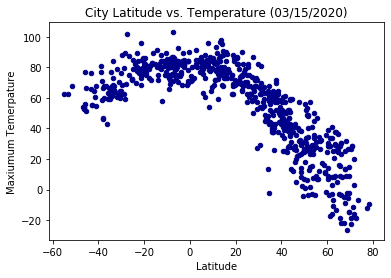

In [6]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
ts = df["Date"][0]
label_plot(ax1, 'City Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature", ts )
plt.savefig('../output_data/temperature_v_latitude.png')
plt.show()


#### Latitude vs Temperature: Observation
Temperatures tend to peak at distance closer to the equator (increasing as it approaches latitude 0) then falls off by distance either to the north or south, with much cooler temperatures observed in the Northern Hemisphere ciites (of course this could be due to the fact there are more cities in the Northern Hemisphere). 

#### Latitude vs. Humidity Plot

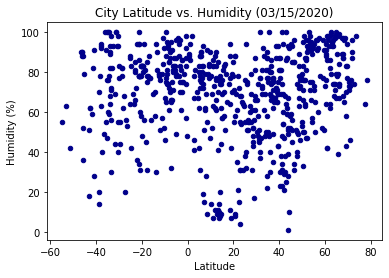

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Humidity', "Latitude", "Humidity (%)", ts )
plt.savefig('../output_data/humidity_v_latitude.png')
plt.show()

#### Latitude vs Humidity: Observation
Humidity appears (for this data set) not to vary greatly by latitude, with the exceptions being north and south extremes. 

#### Latitude vs. Cloudiness Plot

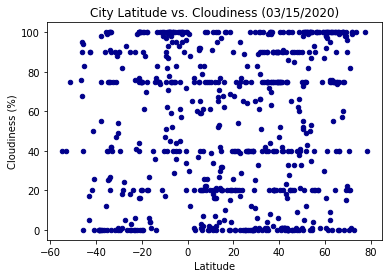

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)", ts )
plt.savefig('../output_data/cloudiness_v_latitude.png')
plt.show()

#### Latitude vs Cloudiness: Observation
There appears to be no strong correlation between latitude and cloudiness. The interesting grid like structure could be because the measurements were rounded up or truncated to the nearest percentage

#### Latitude vs. Wind Speed Plot

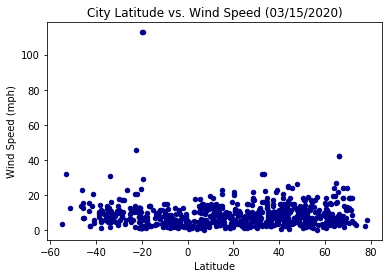

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)", ts )
plt.savefig('../output_data/windspeed_versus_latitude.png')
plt.show()

#### Latitude vs Windspeed: Observation
Again there is no real visible correlation between latitude and windspeed, althought the highest winds are in the Nothern Hemisphere - this could be due to the fact there are more cities. Interesting outlier at latitude -20 with very fast wind speed!

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label, ts):    

    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')

    fig, ax = plt.subplots()

    r_squared = rvalue * rvalue;
    
    print('  The r-value'   + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {r_squared:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    ax.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    ax.plot(x_values,regress_values,"r-")
    
    # convert the time stamp
    analysis_date = (datetime.utcfromtimestamp(ts).strftime('%m/%d/%Y'))
    
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label + ' (' + analysis_date + ')')

    # Annotate with the line equation
    Afont = {'family': 'serif',
             'backgroundcolor': 'white',
             'color':  'red',
             'weight': 'normal',
             'size': 14,
    }
        
    line_eq = ' y= '+ str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #plt.annotate(line_eq,(min(x_values), 1.75*(max(y_values)/2)),fontsize=12,color="red")
    at = AnchoredText(line_eq,
                  frameon=True, prop=Afont,
                  loc='upper right',
                  bbox_to_anchor=(1.5, 1.),
                  bbox_transform=ax.transAxes
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    # Show the plot
    ax

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0].reset_index()    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0].reset_index()   #less than 0 degrees latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  -0.880777 
The r-squared is  0.775769 


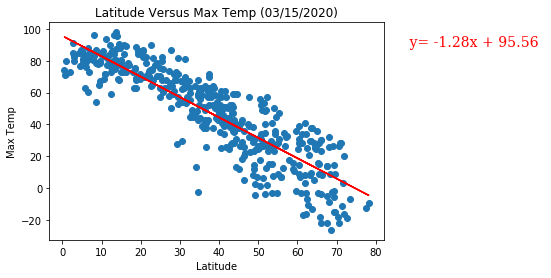

In [12]:
# Call the linear regression function
ts = northern_df["Date"][0]
#print(ts)
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp", ts)
plt.savefig('../output_data/NH_temperature_v_latitude.png')


##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation
There is a strong negative correlation between max temperatures and latitude.  As we move northward away from the equator (latitude 0) maximum temperatures delcine.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  0.642428 
The r-squared is  0.412714 


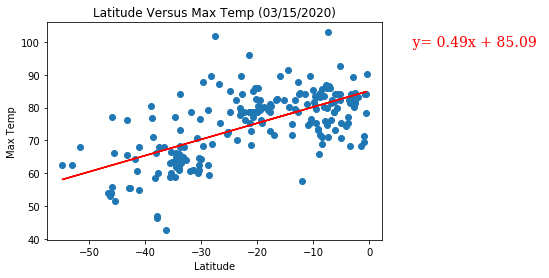

In [13]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude",  "Max Temp", ts)
plt.savefig('../output_data/SH_temperature_v_latitude.png')


##### Southern Hemisphere - Max Temp vs. Latitude Observation
There is a very weak positive correlation between max temperatures and latitude.  As we move northward toward  the equator (latitude 0) maximum temperatures do increase but the r (correlation) value is less than 1.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.273296 
The r-squared is  0.074691 


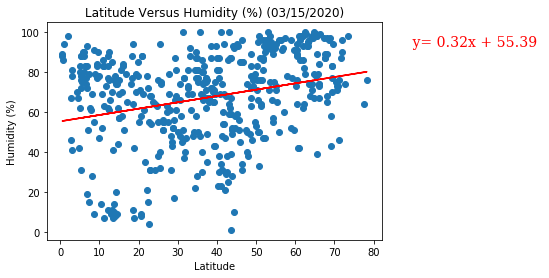

In [14]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude",  "Humidity (%)", ts)
plt.savefig('../output_data/NH_humidity_v_latitude.png')

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

There is no correlation between the percentage humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.199787 
The r-squared is  0.039915 


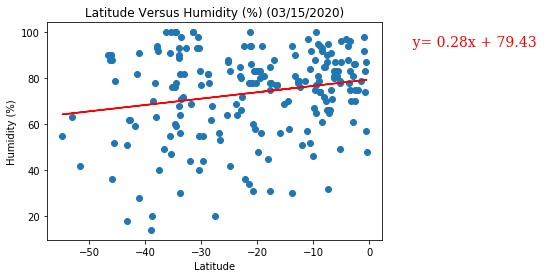

In [15]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity (%)", ts)
plt.savefig('../output_data/SH_humidity_v_latitude.png')

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.219086 
The r-squared is  0.047999 


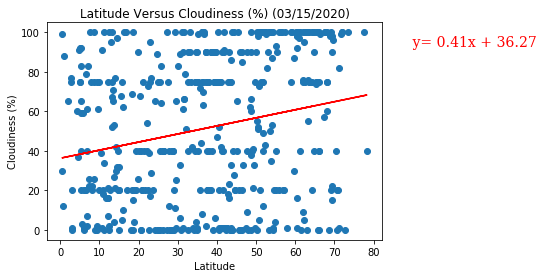

In [16]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness (%)", ts)
plt.savefig('../output_data/NH_cloudiness_v_latitude.png')

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage cloudiness and latitude in the northern hemisphere.  The grid like structure of the scatter plot indicates there might be some binning or rounding of measurements in this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.311388 
The r-squared is  0.096962 


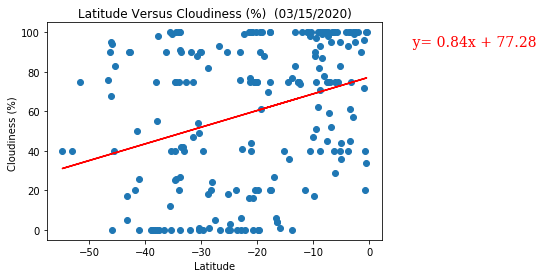

In [17]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness (%) ", ts)
plt.savefig('../output_data/SH_cloudiness_v_latitude.png')

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere, although there do seem to be a higher density of clouds closer to the equator, and very sparse cloud over as we move south from the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  0.147055 
The r-squared is  0.021625 


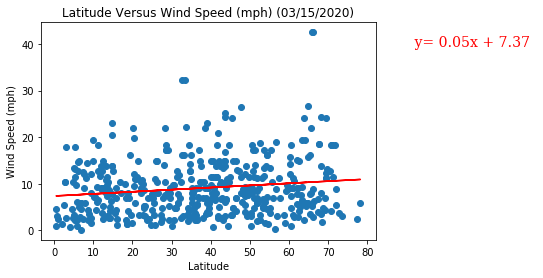

In [18]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude" , "Wind Speed (mph)", ts)
plt.savefig('../output_data/NH_windspeed_v_latitude.png')

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed and latitude in the northern hemisphere.  Winds speeds are mostly below 25-30 mph. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  -0.162075 
The r-squared is  0.026268 


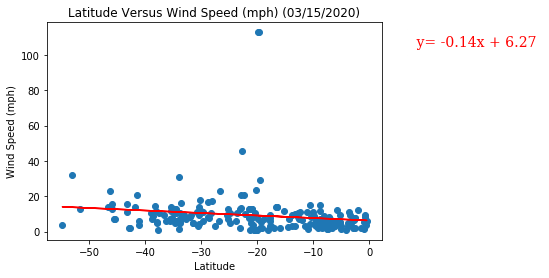

In [19]:
plot_linear_regression( southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed (mph)", ts)
plt.savefig('../output_data/SH_windspeed_v_latitude.png')

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed  and latitude in the southern hemisphere.  In general for this dataset most wind speeds are below 25 mph. 

# End of Notebook 